# Quantum teleportation

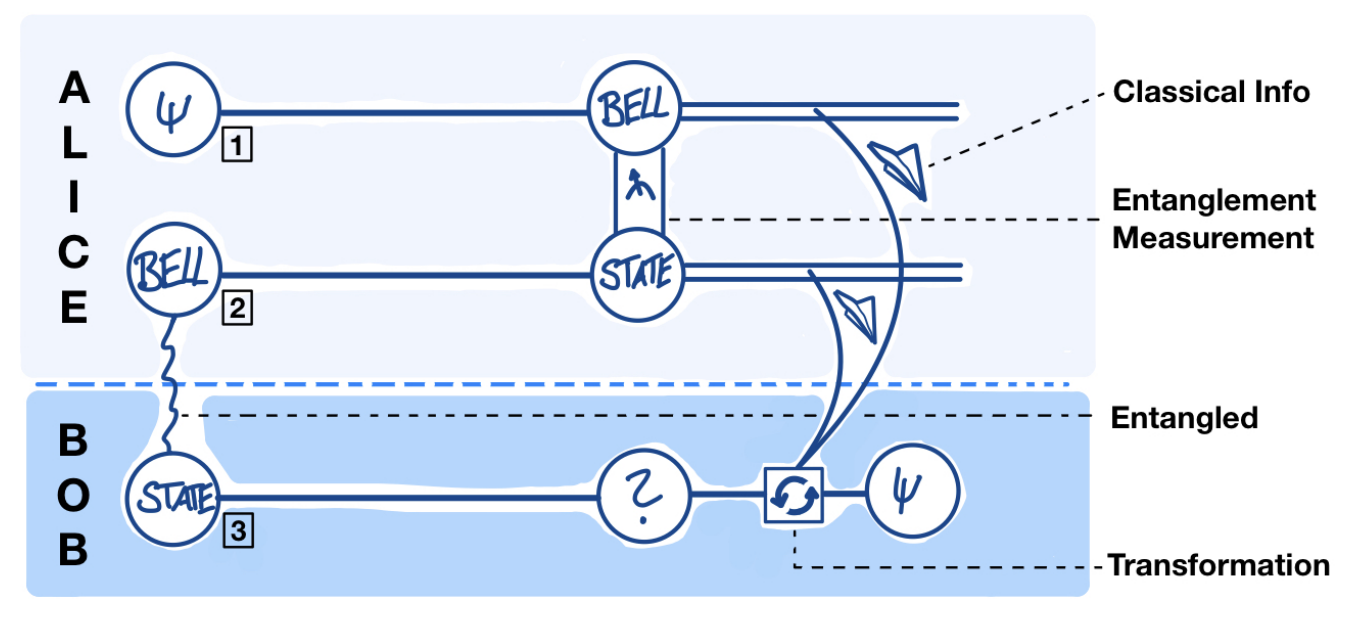

We prepare the Alice's qubit in the uniform superposition state

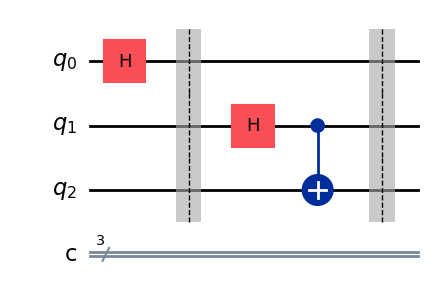

In [1]:
# we need three qubits

from qiskit import QuantumCircuit
import numpy as np

circuit = QuantumCircuit(3,3)


# prepare the psi state in the first qubit (Alice)
circuit.h(0)
circuit.barrier()


# prepare the Bell state in the second (Alice) and third qubits (Bob)
circuit.h(qubit=1) # 00 + 10
circuit.cx(control_qubit=1, target_qubit=2) # 00 + 11
circuit.barrier()

display(circuit.draw("mpl"))

Afterwards, Alice generates the state she wants to send with our quantum teleportation circuit. Now everything needed for quantum teleportation is set and the whole system is in the initial state:

$$
|\Psi\rangle_{123}=\left(\alpha|0\rangle_1+\beta|1\rangle_1\right)\left|\Phi_{23}^{(+)}\right\rangle
$$


To proceed with the teleportation, we need to do a complete Bell operators basis measurement. Since in these quantum computers/circuits, we only measure individual qubits, and only in their $Z$ axis, we need to translate such Bell basis measurement. In this case, such translation is given by an entanglement between both states and then measuring each one separately on their $Z$ axis! Specifically, you need to apply a $C N O T_{1,2}$, as shown in the above circuit, followed by a $H_1$, which transforms your state into:

$$
\begin{aligned}
\left|\Psi_{123}\right\rangle & =\frac{1}{2}|00\rangle_{12}\left(\alpha|0\rangle_3+\beta|1\rangle_3\right)+\frac{1}{2}|01\rangle_{12}\left(\alpha|1\rangle_3+\beta|0\rangle_3\right)+ \\
& +\frac{1}{2}|10\rangle_{12}\left(\alpha|0\rangle_3-\beta|1\rangle_3\right)+\frac{1}{2}|11\rangle_{12}\left(\alpha|1\rangle_3-\beta|0\rangle_3\right)
\end{aligned}
$$


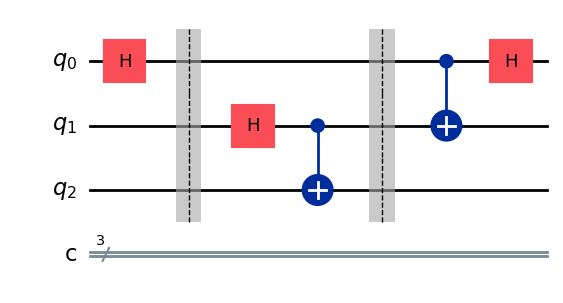

In [2]:
circuit.cx(control_qubit=0, target_qubit=1)
circuit.h(qubit=0)

display(circuit.draw("mpl"))

here we can see that Bob has these 4 possible states, which depend on what Alice measures in the $Z$ axis now!

And since depending on the result of this measurement, you get one state or another, and each one of those corresponds to a different operation to go back to Alice's original send state, you can codify the $Z$ measurement in classical bits of information that Alice sends to Bob!

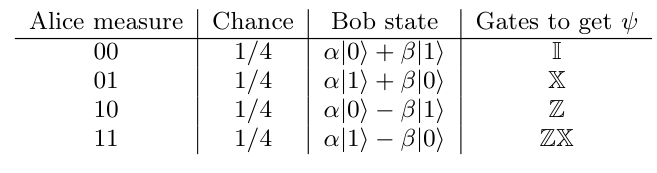

If Alice measures 00, Bob does not need to do nothing,

If Alice measures a 1 in qubit 1, Bob applies a X gate

If Alice measures a 1 in qubit 0, Bob applies a Z gate

If Alice measures 11, Bob applies Z-X gates

Thus, this can be achieved in the circuit by applying control-Z and control-X gates after Alice's measurements.

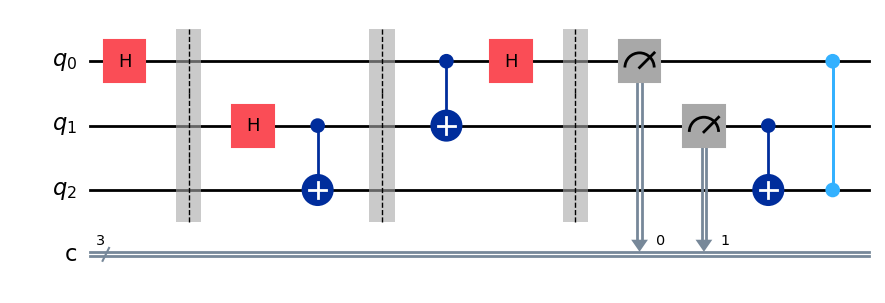

In [3]:
# measure the first two qubits
circuit.barrier()
circuit.measure([0,1], [0,1])

circuit.cx(1,2)
circuit.cz(0,2)

display(circuit.draw("mpl"))


Now, Bob has **exactly** the original Alice's state

In [6]:
from qiskit_aer import StatevectorSimulator

simulator = StatevectorSimulator()

result = simulator.run(circuit).result()
statevector = result.get_statevector(circuit)

In [7]:
statevector.draw('latex')

<IPython.core.display.Latex object>

The state in the kets shown by qiskit is ordered as $|q_2 q_1 q_0\rangle$, so the final state of the circuit, following the notation in the notes is:

$$|10\rangle_{\mathrm{Alice}} \cdot \frac{\sqrt{2}}{2} \left(|0\rangle + |1\rangle \right)_{\mathrm{Bob}}$$

Alice has succesfully teleported her state to Bob's qubit!